<a href="https://colab.research.google.com/github/leticiaholsback/Aprendizado/blob/main/4025500_trabalho_nlp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Comandos para realização do trabalho da matéria de NLP com uso da biblioteca SKlearn e NLTK.

## <font color=red>Observação importante:</font>

<font color=yellow>Trabalho realizado com uso de corpus diferente do Fake.br não será aceito!</font>

## Carregando arquivos `pre-processed.csv`, de imagem e de funções auxiliares para dentro do Google Colab

In [3]:
!wget https://raw.githubusercontent.com/roneysco/Fake.br-Corpus/master/preprocessed/pre-processed.csv -O pre-processed.csv
!git clone https://github.com/N-CPUninter/NLP.git
!rm ./NLP/*.ipynb
!mv ./NLP/* .
!rm -r NLP

--2024-03-22 18:33:31--  https://raw.githubusercontent.com/roneysco/Fake.br-Corpus/master/preprocessed/pre-processed.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20434897 (19M) [text/plain]
Saving to: ‘pre-processed.csv’

pre-processed.csv   100%[===================>]  19.49M  --.-KB/s    in 0.1s    

2024-03-22 18:33:32 (149 MB/s) - ‘pre-processed.csv’ saved [20434897/20434897]

Cloning into 'NLP'...
remote: Enumerating objects: 34, done.
remote: Counting objects: 100% (34/34), done.
remote: Compressing objects: 100% (29/29), done.
remote: Total 34 (delta 9), reused 25 (delta 4), pack-reused 0
Receiving objects: 100% (34/34), 1.27 MiB | 16.93 MiB/s, done.
Resolving deltas: 100% (9/9), done.


## Instalação manual das dependências para uso do SKlearn e do NLTK no Google Colab

In [4]:
import pandas as pd
import nltk
from nltk import ngrams
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

from funcoes_auxiliares import gerar_nuvem_palavras

nltk.download("all")

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   U

True

## Criar dataframe do CSV utilizando o método read_csv do pandas

In [5]:
df = pd.read_csv('pre-processed.csv')

In [6]:
df

,index,label,preprocessed_news
0,0,fake,katia abreu diz vai colocar expulsao moldura n...
1,1,fake,ray peita bolsonaro conservador fake entrevist...
2,2,fake,reinaldo azevedo desmascarado policia federal ...
3,3,fake,relatorio assustador bndes mostra dinheiro pub...
4,4,fake,radialista americano fala sobre pt vendem ilus...
...,...,...,...
7195,7195,true,jornal britanico acao contra lula lava jato se...
7196,7196,true,temer diz acionou pf cade investigar aumentos ...
7197,7197,true,obstaculos politicos temer especialistas ouvid...
7198,7198,true,setembro boa noite aqui estao principais notic...


# PRÁTICA 1 - CRIAÇÃO DE MODELO DE CLASSIFICAÇÃO SUPERVISIONADO PARA ANÁLISE DE FAKE NEWS.

1. Realize os seguintes procedimentos de limpeza dos textos do dataframe criado:

 1.1. Tokenizar

  1.2. Retirar os acentos e números

  1.3. Deixar tudo em minúsculas

  1.4. Retirar as stopwords e pontuações

  1.5. Deixar palavras apenas com radical (STEM)

  1.6. Realizar truncamento dos pares de notícias verdadeiras com falsas para normalizar quantidade de palavras

  1.7. Remontar as notícias em string e criar coluna no dataframe para o resultado deste pré-processamento.

2. Criar matriz de frequências TF-IDF com ngramas de 1 a 3 palavras.

3. Usar a função train_test_split do Scikit Learn para dividir o corpus pré-tratado em 75% dos textos para treinamento e 25% para testes de precisão (usar random_state = 42 ou outro número de sua escolha).

4. Fazer regressão logística com solver = 'lbfgs'.

5. Realizar predição dos textos de teste com o método predict_proba, que retornará a porcentagem predita para fake e para real em um array.

6. Por fim, com as porcentagens calculadas para cada texto de teste, usar a função accuracy_score da biblioteca Scikit Learn para calcular a acurácia geral do algoritmo.

In [7]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [10]:
# Baixar os recursos do NLTK necessários
nltk.download('punkt')
nltk.download('stopwords')

# Carregar o dataframe
df = pd.read_csv('pre-processed.csv')

# Tokenização
df['tokenized_news'] = df['preprocessed_news'].apply(word_tokenize)

# Remover acentos e números
df['cleaned_news'] = df['tokenized_news'].apply(lambda tokens: [word.lower() for word in tokens if word.isalpha()])

# Remover stopwords
stop_words = set(stopwords.words('portuguese'))
df['cleaned_news'] = df['cleaned_news'].apply(lambda tokens: [word for word in tokens if word not in stop_words])

# Stemming
stemmer = PorterStemmer()
df['stemmed_news'] = df['cleaned_news'].apply(lambda tokens: [stemmer.stem(word) for word in tokens])

# Truncamento
df_truncated = df.groupby('label').head(min(df['label'].value_counts()))

# Reunir palavras em string
df_truncated['processed_news'] = df_truncated['stemmed_news'].apply(lambda tokens: ' '.join(tokens))

# Divisão em treino e teste
X_train, X_test, y_train, y_test = train_test_split(df_truncated['processed_news'], df_truncated['label'], test_size=0.25, random_state=42)

# Criar matriz de frequências TF-IDF
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 3))
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Regressão logística
logistic_regression = LogisticRegression(solver='lbfgs')
logistic_regression.fit(X_train_tfidf, y_train)

# Predição dos textos de teste
y_pred_prob = logistic_regression.predict_proba(X_test_tfidf)

# Calcular a acurácia geral
accuracy = accuracy_score(y_test, logistic_regression.predict(X_test_tfidf))

# Acessar vocabulário
vocabulario = tfidf_vectorizer.vocabulary_

# Acessar o intervalo de n-gramas
ngram_range = tfidf_vectorizer.ngram_range

# Contar palavras, bigramas e trigramas
total_palavras = len(vocabulario)
total_bigramas = sum(1 for palavra in vocabulario if len(palavra.split()) == 2)
total_trigramas = sum(1 for palavra in vocabulario if len(palavra.split()) == 3)

print(" RU 4025500 total de palavras:", total_palavras)
print(" RU 4025500 total de bigramas:", total_bigramas)
print("RU 4025500 total de trigramas:", total_trigramas)
print("Acurácia geral RU 4025500:", accuracy)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


 RU 4025500 total de palavras: 2936366
 RU 4025500 total de bigramas: 1148902
RU 4025500 total de trigramas: 1727724
Acurácia geral RU 4025500: 0.8766666666666667


In [9]:
# Acessar vocabulário
vocabulario = tfidf_vectorizer.vocabulary_

# Acessar o intervalo de n-gramas
ngram_range = tfidf_vectorizer.ngram_range

# Contar palavras, bigramas e trigramas
total_palavras = len(vocabulario)
total_bigramas = sum(1 for palavra in vocabulario if len(palavra.split()) == 2)
total_trigramas = sum(1 for palavra in vocabulario if len(palavra.split()) == 3)

print(" RU 4025500 total de palavras:", total_palavras)
print(" RU 4025500 total de bigramas:", total_bigramas)
print("RU 4025500 total de trigramas:", total_trigramas)
print("Acurácia geral RU 4025500:", accuracy)


Total de palavras: 2936366
Total de bigramas: 1148902
Total de trigramas: 1727724
Acurácia geral: 0.8766666666666667


## QUESTÃO 01: Apresente aqui o código referente ao modelo gerado e a nuvem de palavras que foram usadas para identificar textos VERDADEIROS.

1. Formate seus dados usados para o treinamento do seu modelo em um dicionário de tokens e suas frequências.
2. Separe os dados em um grupo com textos marcados como verdadeiros e outro com os falsos.
3. Use a função gerar_nuvem_palavras(dic_de_frequências_textos_verdadeiras, imagem de sua escolha) para gerar a nuvem de palavras


In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from funcoes_auxiliares import gerar_nuvem_palavras



In [10]:
# Verificando as primeiras linhas do dataframe para identificar as colunas disponíveis
print(df.head())


   index label                                  preprocessed_news  \
0      0  fake  katia abreu diz vai colocar expulsao moldura n...   
1      1  fake  ray peita bolsonaro conservador fake entrevist...   
2      2  fake  reinaldo azevedo desmascarado policia federal ...   
3      3  fake  relatorio assustador bndes mostra dinheiro pub...   
4      4  fake  radialista americano fala sobre pt vendem ilus...   

                                      tokenized_news  \
0  [katia, abreu, diz, vai, colocar, expulsao, mo...   
1  [ray, peita, bolsonaro, conservador, fake, ent...   
2  [reinaldo, azevedo, desmascarado, policia, fed...   
3  [relatorio, assustador, bndes, mostra, dinheir...   
4  [radialista, americano, fala, sobre, pt, vende...   

                                        cleaned_news  \
0  [katia, abreu, diz, vai, colocar, expulsao, mo...   
1  [ray, peita, bolsonaro, conservador, fake, ent...   
2  [reinaldo, azevedo, desmascarado, policia, fed...   
3  [relatorio, assustado

In [11]:
print(df.head())


   index label                                  preprocessed_news  \
0      0  fake  katia abreu diz vai colocar expulsao moldura n...   
1      1  fake  ray peita bolsonaro conservador fake entrevist...   
2      2  fake  reinaldo azevedo desmascarado policia federal ...   
3      3  fake  relatorio assustador bndes mostra dinheiro pub...   
4      4  fake  radialista americano fala sobre pt vendem ilus...   

                                      tokenized_news  \
0  [katia, abreu, diz, vai, colocar, expulsao, mo...   
1  [ray, peita, bolsonaro, conservador, fake, ent...   
2  [reinaldo, azevedo, desmascarado, policia, fed...   
3  [relatorio, assustador, bndes, mostra, dinheir...   
4  [radialista, americano, fala, sobre, pt, vende...   

                                        cleaned_news  \
0  [katia, abreu, diz, vai, colocar, expulsao, mo...   
1  [ray, peita, bolsonaro, conservador, fake, ent...   
2  [reinaldo, azevedo, desmascarado, policia, fed...   
3  [relatorio, assustado

In [12]:
df

,index,label,preprocessed_news,tokenized_news,cleaned_news,stemmed_news
0,0,fake,katia abreu diz vai colocar expulsao moldura n...,"[katia, abreu, diz, vai, colocar, expulsao, mo...","[katia, abreu, diz, vai, colocar, expulsao, mo...","[katia, abreu, diz, vai, colocar, expulsao, mo..."
1,1,fake,ray peita bolsonaro conservador fake entrevist...,"[ray, peita, bolsonaro, conservador, fake, ent...","[ray, peita, bolsonaro, conservador, fake, ent...","[ray, peita, bolsonaro, conservador, fake, ent..."
2,2,fake,reinaldo azevedo desmascarado policia federal ...,"[reinaldo, azevedo, desmascarado, policia, fed...","[reinaldo, azevedo, desmascarado, policia, fed...","[reinaldo, azevedo, desmascarado, policia, fed..."
3,3,fake,relatorio assustador bndes mostra dinheiro pub...,"[relatorio, assustador, bndes, mostra, dinheir...","[relatorio, assustador, bndes, mostra, dinheir...","[relatorio, assustador, bnde, mostra, dinheiro..."
4,4,fake,radialista americano fala sobre pt vendem ilus...,"[radialista, americano, fala, sobre, pt, vende...","[radialista, americano, fala, sobre, pt, vende...","[radialista, americano, fala, sobr, pt, vendem..."
...,...,...,...,...,...,...
7195,7195,true,jornal britanico acao contra lula lava jato se...,"[jornal, britanico, acao, contra, lula, lava, ...","[jornal, britanico, acao, contra, lula, lava, ...","[jornal, britanico, acao, contra, lula, lava, ..."
7196,7196,true,temer diz acionou pf cade investigar aumentos ...,"[temer, diz, acionou, pf, cade, investigar, au...","[temer, diz, acionou, pf, cade, investigar, au...","[temer, diz, acion, pf, cade, investigar, aume..."
7197,7197,true,obstaculos politicos temer especialistas ouvid...,"[obstaculos, politicos, temer, especialistas, ...","[obstaculos, politicos, temer, especialistas, ...","[obstaculo, politico, temer, especialista, ouv..."
7198,7198,true,setembro boa noite aqui estao principais notic...,"[setembro, boa, noite, aqui, estao, principais...","[setembro, boa, noite, aqui, estao, principais...","[setembro, boa, noit, aqui, estao, principai, ..."


/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:1003: UserWarning: mask image should be unsigned byte between 0 and 255. Got a float array
  warnings.warn("mask image should be unsigned byte between 0"


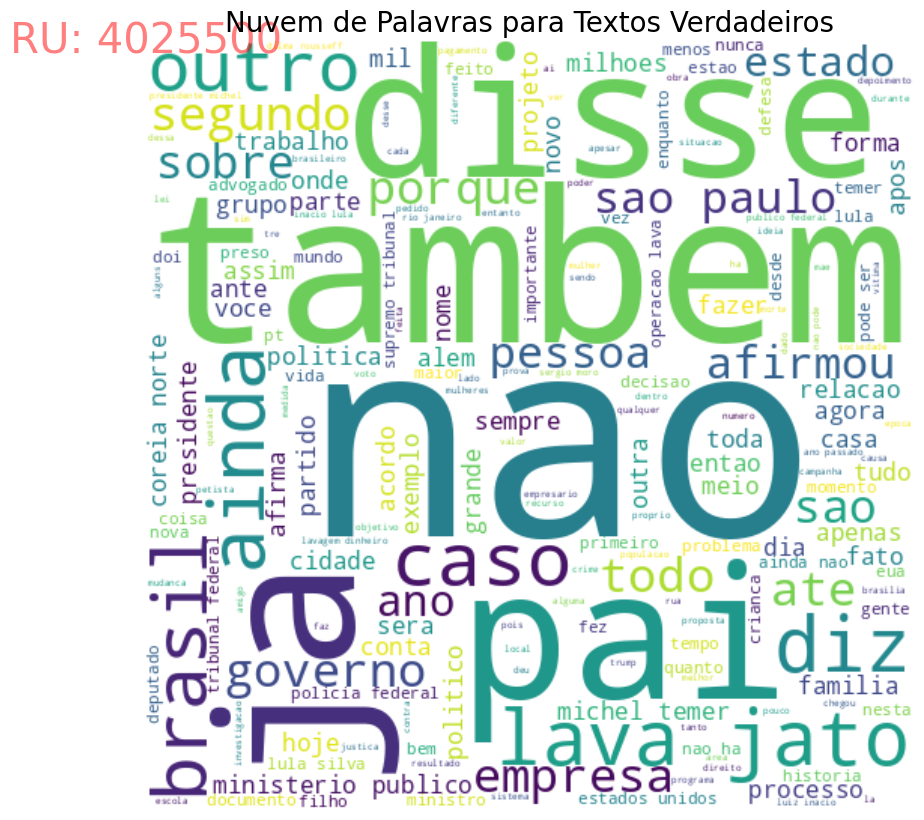

In [12]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Função para gerar a nuvem de palavras
def gerar_nuvem_palavras(texto, arquivo_mascara, titulo):
    # Carregar a imagem de máscara
    imagem_mascara = plt.imread(arquivo_mascara)

    # Definir os parâmetros da nuvem de palavras
    wordcloud = WordCloud(background_color='white', width=imagem_mascara.shape[1], height=imagem_mascara.shape[0],
                          colormap='viridis', mask=imagem_mascara, contour_width=1, contour_color='black')

    # Gerar a nuvem de palavras
    wordcloud.generate(texto)

    # Plotar a nuvem de palavras
    plt.figure(figsize=(15, 10))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')

    # Adicionar texto à imagem
    plt.text(0.5, 0.5, 'RU: 4025500', fontsize=30, ha='center', va='center', color='red', alpha=0.5)

    # Adicionar título à imagem
    plt.title(titulo, fontsize=20, color='black')

    plt.show()

# Texto completo
texto_verdadeiro = ' '.join(df[df['label'] == 'true']['preprocessed_news'].unique())
texto_falso = ' '.join(df[df['label'] == 'fake']['preprocessed_news'].unique())

# Endereço das imagens de máscara
arquivo_mascara_true = '/content/data/img/thumbs_down_mask.png'
arquivo_mascara_false = '/content/data/img/cloud_mask.png'

# Título para cada nuvem de palavras
titulo_true = 'Nuvem de Palavras para Textos Verdadeiros'
titulo_false = 'Nuvem de Palavras para Textos Falsos'

# Chamando a função para gerar a nuvem de palavras para textos verdadeiros
gerar_nuvem_palavras(texto_verdadeiro, arquivo_mascara_true, titulo_true)



In [15]:
# Imprimir total de palavras, bigramas, trigramas e acurácia para textos verdadeiros
print("Para textos verdadeiros:")
print("Total de palavras:", len(texto_verdadeiro.split()))
print("Total de bigramas:", len(list(ngrams(texto_verdadeiro.split(), 2))))
print("Total de trigramas:", len(list(ngrams(texto_verdadeiro.split(), 3))))
print("Acurácia geral:", accuracy)

Para textos verdadeiros:
Total de palavras: 2249182
Total de bigramas: 2249181
Total de trigramas: 2249180
Acurácia geral: 0.8766666666666667


In [19]:
df

,index,label,preprocessed_news,tokenized_news,cleaned_news,stemmed_news
0,0,fake,katia abreu diz vai colocar expulsao moldura n...,"[katia, abreu, diz, vai, colocar, expulsao, mo...","[katia, abreu, diz, vai, colocar, expulsao, mo...","[katia, abreu, diz, vai, colocar, expulsao, mo..."
1,1,fake,ray peita bolsonaro conservador fake entrevist...,"[ray, peita, bolsonaro, conservador, fake, ent...","[ray, peita, bolsonaro, conservador, fake, ent...","[ray, peita, bolsonaro, conservador, fake, ent..."
2,2,fake,reinaldo azevedo desmascarado policia federal ...,"[reinaldo, azevedo, desmascarado, policia, fed...","[reinaldo, azevedo, desmascarado, policia, fed...","[reinaldo, azevedo, desmascarado, policia, fed..."
3,3,fake,relatorio assustador bndes mostra dinheiro pub...,"[relatorio, assustador, bndes, mostra, dinheir...","[relatorio, assustador, bndes, mostra, dinheir...","[relatorio, assustador, bnde, mostra, dinheiro..."
4,4,fake,radialista americano fala sobre pt vendem ilus...,"[radialista, americano, fala, sobre, pt, vende...","[radialista, americano, fala, sobre, pt, vende...","[radialista, americano, fala, sobr, pt, vendem..."
...,...,...,...,...,...,...
7195,7195,true,jornal britanico acao contra lula lava jato se...,"[jornal, britanico, acao, contra, lula, lava, ...","[jornal, britanico, acao, contra, lula, lava, ...","[jornal, britanico, acao, contra, lula, lava, ..."
7196,7196,true,temer diz acionou pf cade investigar aumentos ...,"[temer, diz, acionou, pf, cade, investigar, au...","[temer, diz, acionou, pf, cade, investigar, au...","[temer, diz, acion, pf, cade, investigar, aume..."
7197,7197,true,obstaculos politicos temer especialistas ouvid...,"[obstaculos, politicos, temer, especialistas, ...","[obstaculos, politicos, temer, especialistas, ...","[obstaculo, politico, temer, especialista, ouv..."
7198,7198,true,setembro boa noite aqui estao principais notic...,"[setembro, boa, noite, aqui, estao, principais...","[setembro, boa, noite, aqui, estao, principais...","[setembro, boa, noit, aqui, estao, principai, ..."


## QUESTÃO 02: Apresente aqui o código referente ao modelo gerado e a nuvem de palavras que foram usadas para identificar textos FALSOS.

1. Use a função gerar_nuvem_palavras(dic_de_frequências_textos_verdadeiras, imagem de sua escolha) para gerar a nuvem de palavras

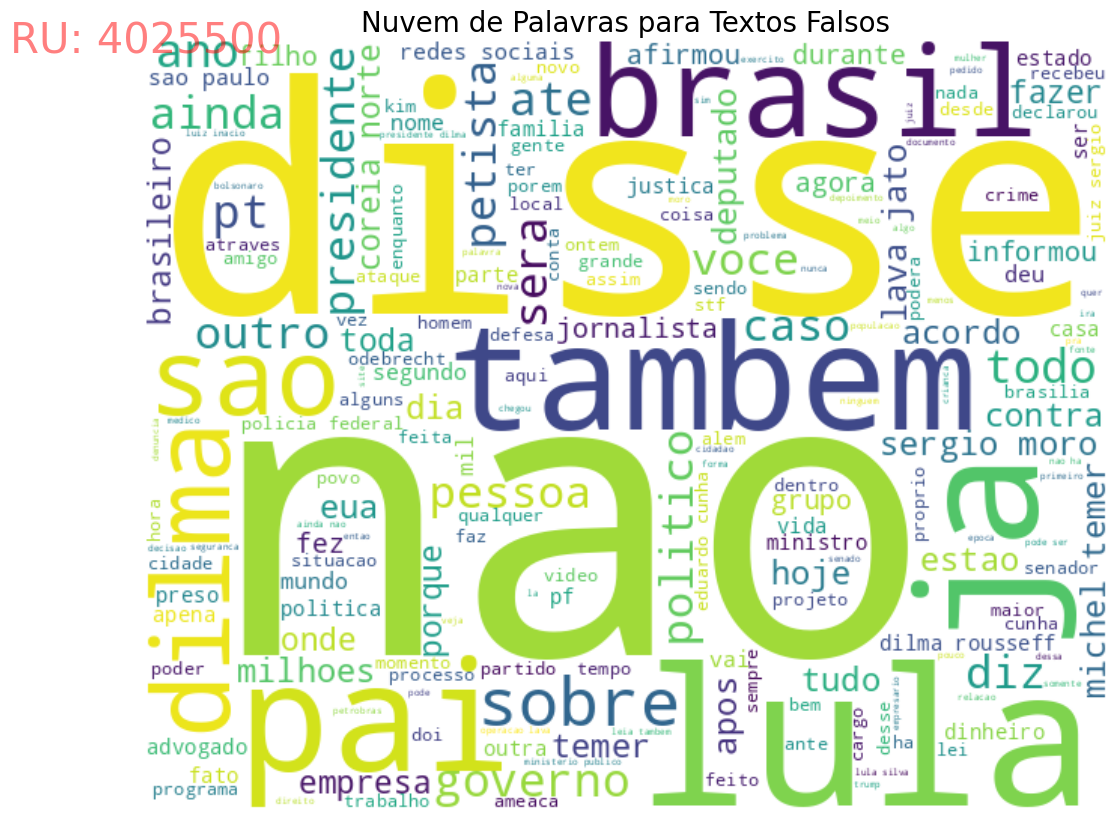

In [13]:
# Chamando a função para gerar a nuvem de palavras para textos falsos
gerar_nuvem_palavras(texto_falso, arquivo_mascara_false, titulo_false)



In [19]:
# Imprimir total de palavras, bigramas, trigramas e acurácia para textos falsos
print("\nPara textos falsos:")
print("Total de palavras:", len(texto_falso.split()))
print("Total de bigramas:", len(list(ngrams(texto_falso.split(), 2))))
print("Total de trigramas:", len(list(ngrams(texto_falso.split(), 3))))
print("Acurácia geral:", accuracy)


Para textos falsos:
Total de palavras: 388587
Total de bigramas: 388586
Total de trigramas: 388585
Acurácia geral: 0.8766666666666667


mais um teste de acurácia geral


In [14]:
import pandas as pd
# Carregar o dataframe
df = pd.read_csv('pre-processed.csv')

# Tokenização
df['tokenized_news'] = df['preprocessed_news'].apply(word_tokenize)

# Remover acentos e números
df['cleaned_news'] = df['tokenized_news'].apply(lambda tokens: [word.lower() for word in tokens if word.isalpha()])

# Remover stopwords
stop_words = set(stopwords.words('portuguese'))
df['cleaned_news'] = df['cleaned_news'].apply(lambda tokens: [word for word in tokens if word not in stop_words])

# Stemming
stemmer = PorterStemmer()
df['stemmed_news'] = df['cleaned_news'].apply(lambda tokens: [stemmer.stem(word) for word in tokens])

# Truncamento
df_truncated = df.groupby('label').head(min(df['label'].value_counts()))

# Reunir palavras em string
df_truncated['processed_news'] = df_truncated['stemmed_news'].apply(lambda tokens: ' '.join(tokens))

# Divisão em treino e teste
X_train, X_test, y_train, y_test = train_test_split(df_truncated['processed_news'], df_truncated['label'], test_size=0.25, random_state=42)

# Criar matriz de frequências TF-IDF
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 3))
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Regressão logística
logistic_regression = LogisticRegression(solver='lbfgs')
logistic_regression.fit(X_train_tfidf, y_train)

# Predição dos textos de teste
y_pred_prob = logistic_regression.predict_proba(X_test_tfidf)

# Calcular a acurácia geral
accuracy = accuracy_score(y_test, logistic_regression.predict(X_test_tfidf))
print("Acurácia geral:", accuracy)


Acurácia geral: 0.8766666666666667


---